In [55]:
!pip install streamlit
!pip install openpyxl
!pip install seaborn matplotlib pandas scikit-learn

In [56]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [57]:
st.set_page_config(page_title="World Development Cluster Analysis", layout="wide")

2025-10-11 04:22:57.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [6]:
st.title("Cluster Analysis – World Development Project")

2025-10-11 04:00:27.647 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:00:28.007 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-11 04:00:28.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:00:28.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [21]:
st.write("/content/World_development_mesurement.xlsx")

2025-10-11 04:03:53.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:03:53.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:03:53.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [81]:
# ---- Load dataset ----
try:
    df = pd.read_excel("/content/World_development_mesurement.xlsx", sheet_name='world_development', engine='openpyxl')
    print(" File loaded successfully!")
except FileNotFoundError:
    print(" File not found. Please make sure 'World_development_mesurement.xlsx' is in the correct directory.")
except Exception as e:
    print(f" An error occurred while loading the file: {e}")

 File loaded successfully!


In [23]:
# ---- Data preview ----
if 'df' in locals():
    print("Data Overview")
    display(df.head())

    # ---- Shape and Columns ----
    print(f"*Rows:* {df.shape[0]} | *Columns:* {df.shape[1]}")
    print("*Column Names:*", list(df.columns))
else:
    print("Dataframe 'df' not loaded. Please check the file path and try again.")

Data Overview


,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


*Rows:* 2704 | *Columns:* 25
*Column Names:* ['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country', 'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Number of Records', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban', 'Tourism Inbound', 'Tourism Outbound']


In [25]:
# Data Cleaning
st.subheader("Data Cleaning")
df.replace('[\$,]', '', regex=True, inplace=True)
df.replace('%', '', regex=True, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

df.fillna(df.median(numeric_only=True), inplace=True)
st.write("Missing values handled successfully.")

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2423647074.py:3: SyntaxWarning: invalid escape sequence '\$'
  df.replace('[\$,]', '', regex=True, inplace=True)
2025-10-11 04:05:04.958 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:05:04.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:05:04.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/tmp/ipython-input-2423647074.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
2025-10-11 04:05:04.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:05:04

2025-10-11 04:05:42.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:05:42.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:05:42.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:05:42.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:05:43.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:05:43.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:05:43.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

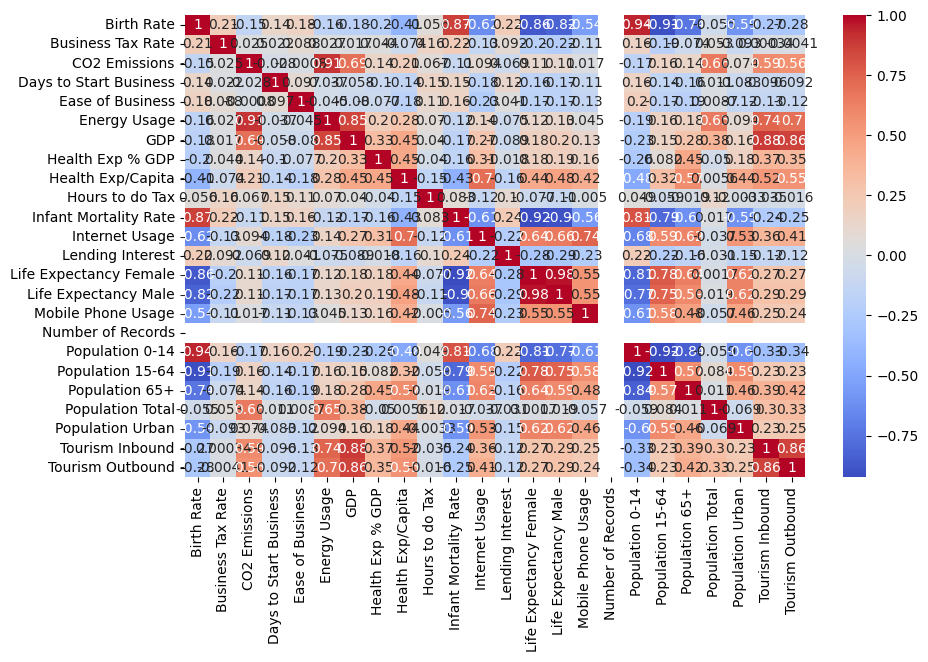

In [27]:
# Correlation Heatmap
st.subheader("Correlation Heatmap")
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", annot=True)
st.pyplot(fig)

In [29]:
# Histogram Distribution
st.subheader("Histogram Distribution")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
selected_col = st.selectbox("Select a column to view histogram:", numeric_cols)

2025-10-11 04:06:24.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:06:24.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:06:24.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:06:24.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:06:24.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:06:24.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:06:24.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:06:24.281 Session state does not function when running a script without `streamlit run`
2025-10-11 04:06

In [31]:
fig, ax = plt.subplots()
sns.histplot(df[selected_col].dropna(), kde=True, color="green", edgecolor="black")
plt.title(f"Distribution of {selected_col}")
st.pyplot(fig)

2025-10-11 04:07:24.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:07:24.372 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:07:24.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:07:24.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [33]:
# Bivariate Analysis
st.subheader("Bivariate Analysis")
x_col = st.selectbox("Select X-axis:", numeric_cols)
y_col = st.selectbox("Select Y-axis:", numeric_cols)
fig, ax = plt.subplots()
sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
st.pyplot(fig)

2025-10-11 04:08:27.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:08:27.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:08:27.232 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:08:27.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:08:27.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:08:27.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:08:27.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:08:27.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [35]:
# K-Means Clustering
st.subheader("K-Means Clustering")
num_clusters = st.slider("Select number of clusters (K):", 2, 10, 3)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))

2025-10-11 04:09:05.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:09:05.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:09:05.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:09:05.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:09:05.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:09:05.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:09:05.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:09:05.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [37]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)
st.write("K-Means clustering applied successfully.")

2025-10-11 04:09:37.534 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:09:37.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:09:37.536 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [39]:
# Cluster Visualization
st.subheader("Cluster Visualization")
p1 = st.selectbox("Select X-axis for cluster plot:", numeric_cols)
p2 = st.selectbox("Select Y-axis for cluster plot:", numeric_cols)

2025-10-11 04:10:06.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:10:06.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:10:06.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:10:06.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:10:06.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:10:06.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:10:06.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:10:06.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [58]:
fig, ax = plt.subplots()
sns.scatterplot(x=df[p1], y=df[p2], hue=df["Cluster"], palette="Set2")
plt.title(f"Clusters visualized on {p1} vs {p2}")
st.pyplot(fig)


2025-10-11 04:23:53.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:23:53.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:23:53.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:23:53.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [54]:
# Cluster Summary
st.subheader("Cluster Summary")
st.write(df.select_dtypes(include=np.number).groupby("Cluster").mean())


2025-10-11 04:21:21.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:21:21.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:21:21.414 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:21:21.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:21:21.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-11 04:21:21.422 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [59]:
!pip install streamlit pyngrok openpyxl seaborn matplotlib scikit-learn pandas


In [74]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

st.set_page_config(page_title="World Development Cluster Analysis", layout="wide")
st.title(" Cluster Analysis – World Development Project")

st.sidebar.header("Upload Dataset")
uploaded_file = st.sidebar.file_uploader("Upload your Excel file", type=["xlsx"])

if uploaded_file is not None:
    try:
        df = pd.read_excel(uploaded_file, sheet_name='world_development', engine='openpyxl')
        st.success(" File loaded successfully!")

        st.subheader("Data Overview")
        st.dataframe(df.head())
        st.write(f"**Rows:** {df.shape[0]} | **Columns:** {df.shape[1]}")
        st.write("**Column Names:**", list(df.columns))

        st.subheader("Data Cleaning")
        df.replace('[\\$,]', '', regex=True, inplace=True)
        df.replace('%', '', regex=True, inplace=True)
        # Convert columns to numeric, coercing errors to NaN
        for col in df.columns:
            if col != 'Country': # Assuming 'Country' is the only non-numeric column to keep as object
                 df[col] = pd.to_numeric(df[col], errors='coerce')

        df.fillna(df.median(numeric_only=True), inplace=True)
        st.info("Missing values handled successfully.")

        st.subheader("Correlation Heatmap")
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", annot=True)
        st.pyplot(fig)

        st.subheader("Histogram Distribution")
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        selected_col = st.selectbox("Select a column:", numeric_cols)
        fig, ax = plt.subplots()
        sns.histplot(df[selected_col], bins=20, kde=True)
        st.pyplot(fig)

        st.subheader("Bivariate Analysis")
        x_col = st.selectbox("Select X-axis:", numeric_cols)
        y_col = st.selectbox("Select Y-axis:", numeric_cols)
        fig, ax = plt.subplots()
        sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
        st.pyplot(fig)


        st.subheader("K-Means Clustering")
        numeric_df = df.select_dtypes(include=[np.number])
        scaled_data = StandardScaler().fit_transform(numeric_df)
        k = st.slider("Select number of clusters (k):", 2, 10, 3)

        # Drop 'Cluster' column if it already exists
        if 'Cluster' in df.columns:
            df = df.drop('Cluster', axis=1)

        kmeans = KMeans(n_clusters=k, random_state=42)
        df['Cluster'] = kmeans.fit_predict(scaled_data)
        st.write(f"Clustering done with **{k} clusters**.")
        st.dataframe(df[['Cluster'] + numeric_df.columns.tolist()].head())

        st.subheader("Cluster Visualization")
        p1 = st.selectbox("Select X-axis for cluster plot:", numeric_cols, key='p1_select')
        p2 = st.selectbox("Select Y-axis for cluster plot:", numeric_cols, key='p2_select')
        fig, ax = plt.subplots()
        sns.scatterplot(x=df[p1], y=df[p2], hue=df["Cluster"], palette="Set2")
        plt.title(f"Clusters visualized on {p1} vs {p2}")
        st.pyplot(fig)


        st.subheader("Cluster Summary")
        st.write(df.select_dtypes(include=np.number).groupby("Cluster").mean())


    except Exception as e:
        st.error(f" An error occurred: {e}")

else:
    st.warning("Please upload an Excel file to begin.")

Overwriting app.py


Now that the `app.py` file is created, you can run your Streamlit application using `pyngrok`. This will create a public URL that you can use to access your app.

In [79]:
!ngrok authtoken 33uHhF6l6KKvhPBrOPeGcj5lHGA_3b611cHo1DY6dBPBs3JFb

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Kill any existing tunnels
ngrok.kill()

# Run Streamlit app
public_url = ngrok.connect(8501)
print("Your app is live here:", public_url)
!streamlit run app.py --server.port 8501


Your app is live here: NgrokTunnel: "https://rankish-semiexclusive-holley.ngrok-free.dev" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.58.28.244:8501

